##### Notebook for the investigation of the reproducibility of scipy.fft, scipy.dft, scipy.signal.spectrogram and librosa.display.specshow methods and their applicability to distinguishing audio signals which overlap in the time and frequency domains.

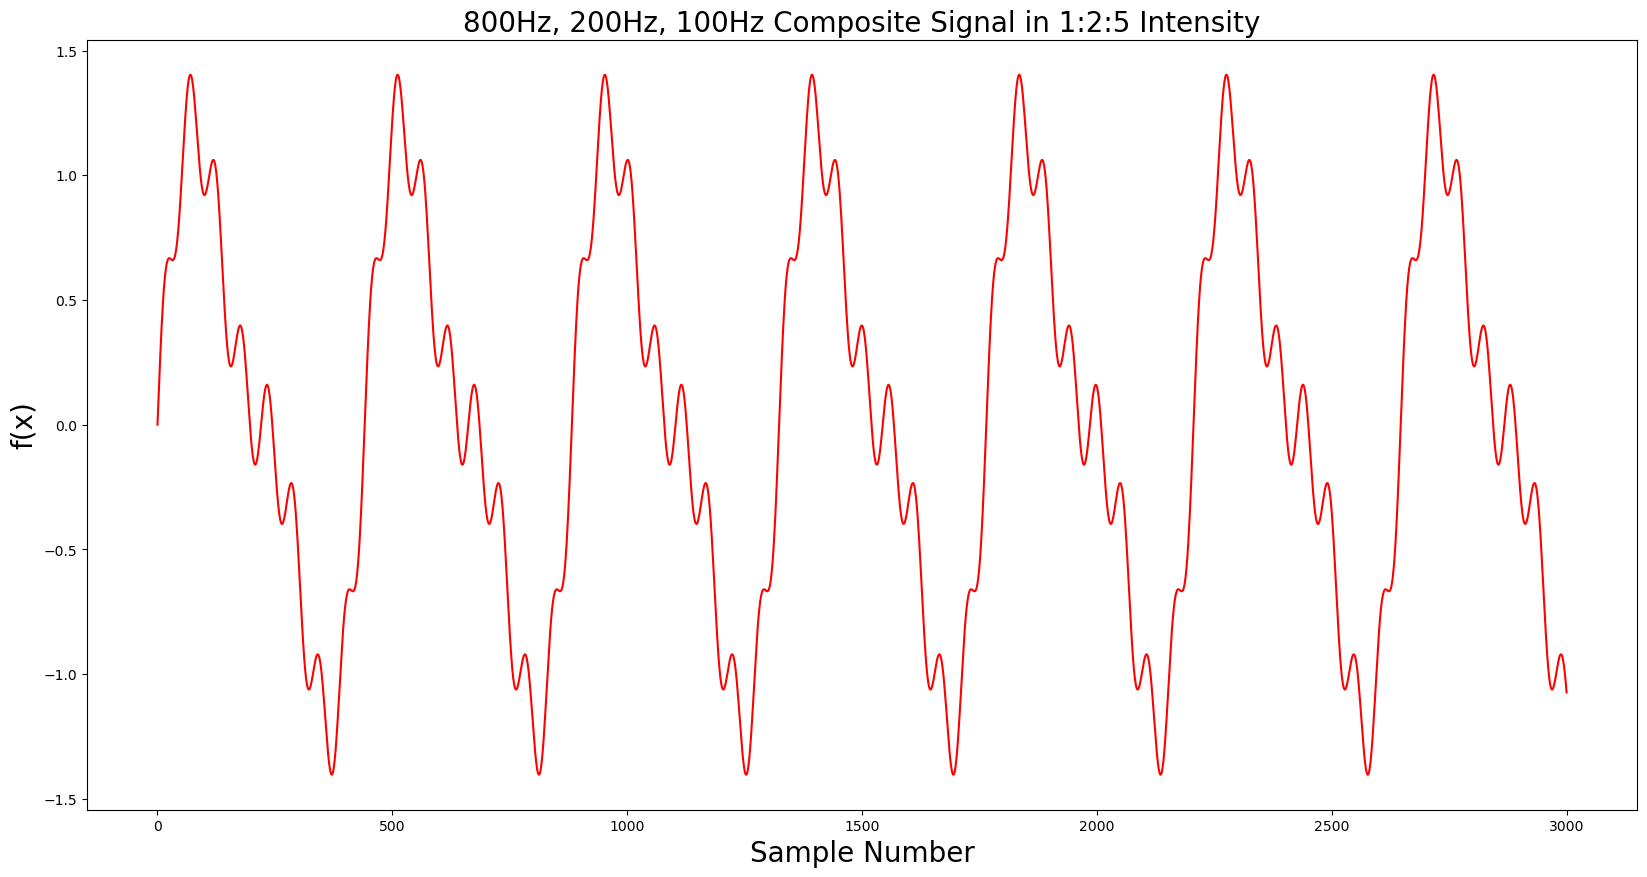

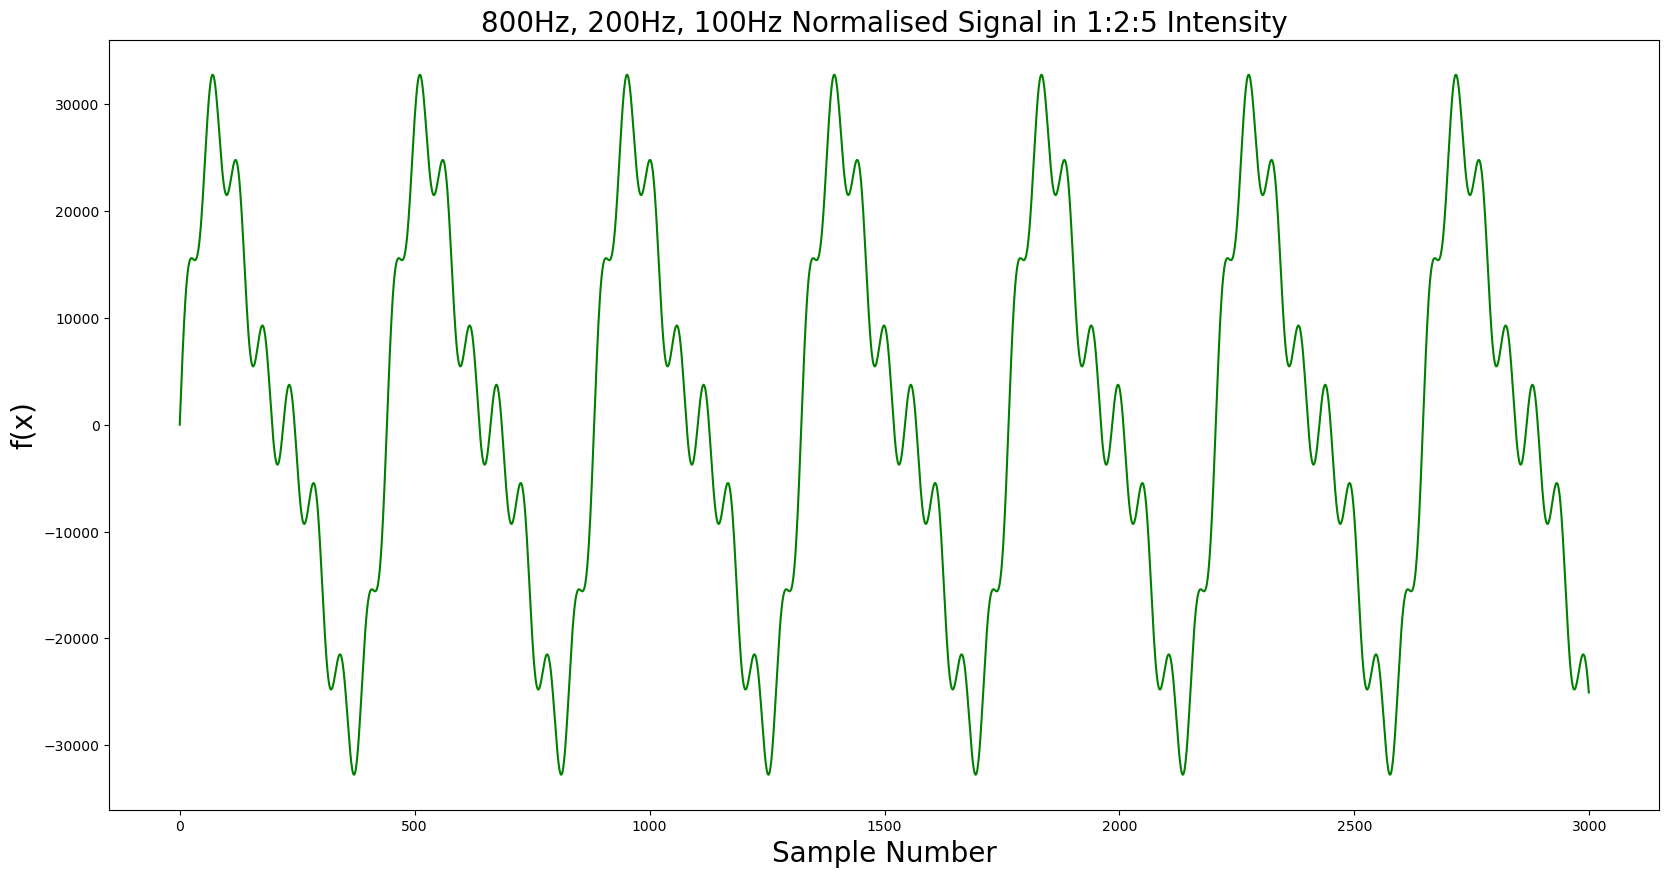

In [66]:
# reproducability test of scipy.fft

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.fft import fft, fftfreq, rfft, rfftfreq
import wave
import errno
import os

# constants
SAMPLE_FREQUENCY = 44100;                 # frequency (Hz)
SAMPLING_DURATION  = 4;                   # time (s)
N = SAMPLE_FREQUENCY * SAMPLING_DURATION  # number of samples

# Generate periodic signal of given frequency
def gen_simple_sinwave(frequency, rate, duration):
  x = np.linspace(0, duration, (rate*duration), endpoint=False)
  frequencies = x*frequency
  y = np.sin( (np.pi*2) * frequencies)
  return x,y

# Simulate composite signal consisting of 3 frequencies with weighting
_, sig_1 = gen_simple_sinwave(100, SAMPLE_FREQUENCY, SAMPLING_DURATION)
_, sig_2 = gen_simple_sinwave(200, SAMPLE_FREQUENCY, SAMPLING_DURATION)
_, sig_3 = gen_simple_sinwave(800, SAMPLE_FREQUENCY, SAMPLING_DURATION)
sig_comp = sig_1 + (0.4*sig_2) + (0.2*sig_3)
plt.figure(figsize=(20,10))
plt.plot(sig_comp[:3000], color='red')
plt.title('800Hz, 200Hz, 100Hz Composite Signal in 1:2:5 Intensity',
          fontsize=20)
plt.ylabel('f(x)', 
          fontsize=20)
plt.xlabel('Sample Number', 
          fontsize=20)
plt.show()

# Normalise composite signal for 16-bit "type"
sig_norm = np.int16( (sig_comp / sig_comp.max() ) * 32767)
plt.figure(figsize=(20,10))
plt.plot(sig_norm[:3000], color='green')
plt.title('800Hz, 200Hz, 100Hz Normalised Signal in 1:2:5 Intensity', 
          fontsize=20)
plt.ylabel('f(x)', 
          fontsize=20)
plt.xlabel('Sample Number', 
          fontsize=20)
plt.show()



# Export composite signal for input processing later
write('test_sample.wav', SAMPLE_FREQUENCY, sig_norm)

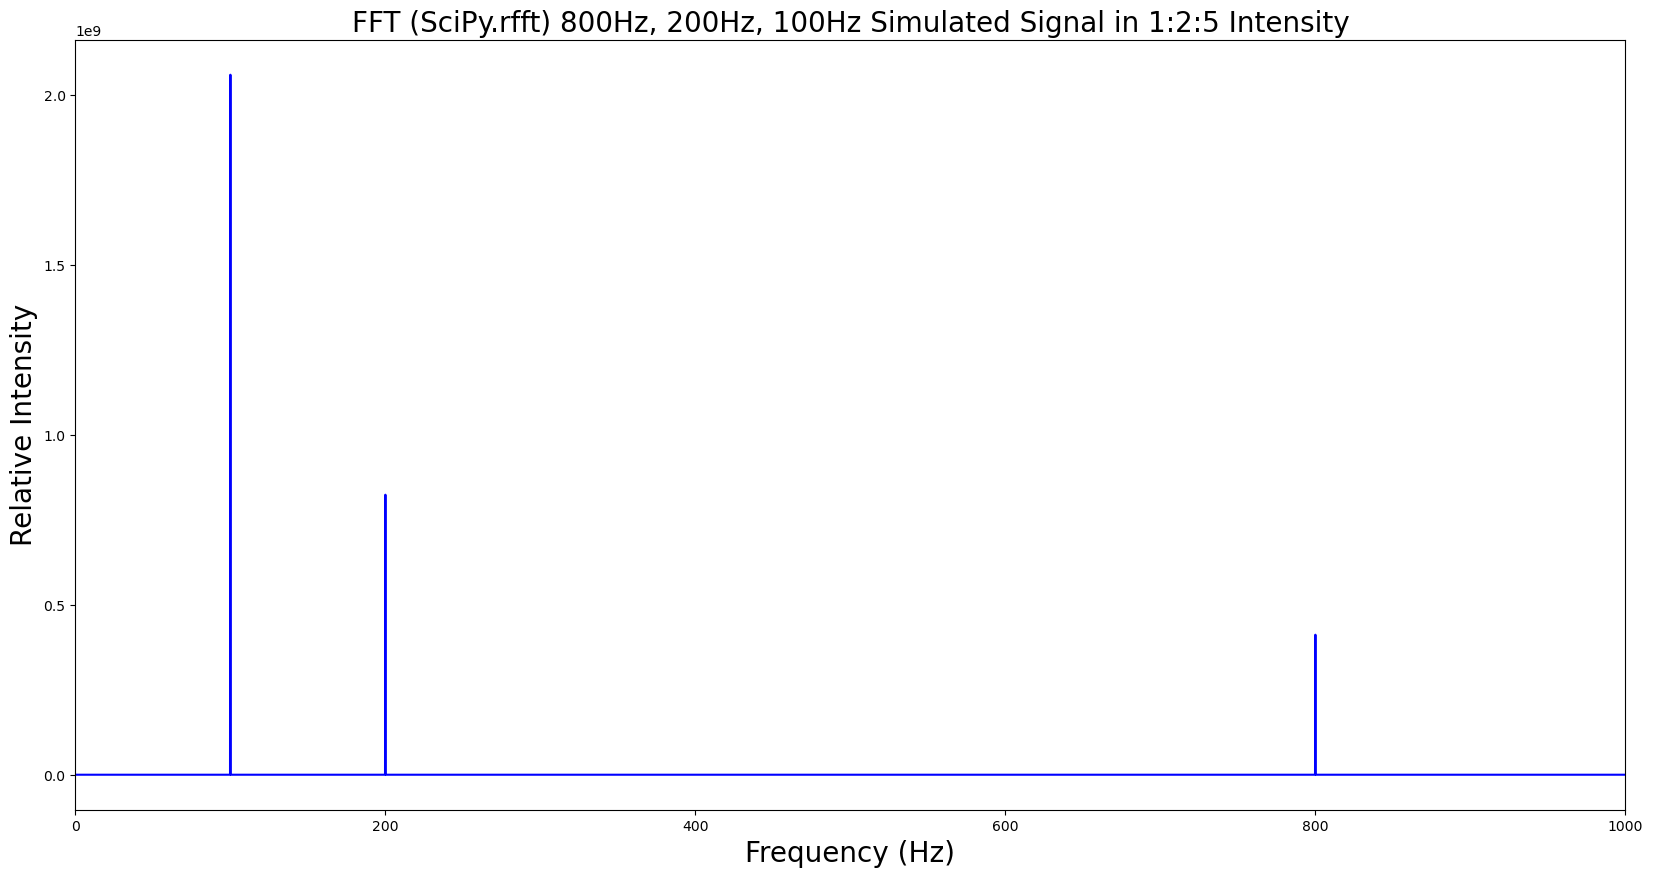

In [67]:
# Plot FFT to check 3 frequencies present at correct intensities (5:2:1)
yj = rfft(sig_norm)
xj = rfftfreq(N, 1/SAMPLE_FREQUENCY)
plt.figure(figsize=(20,10))
plt.plot(xj, np.abs(yj), color='blue')
plt.title('FFT (SciPy.rfft) 800Hz, 200Hz, 100Hz Simulated Signal in 1:2:5 Intensity',
          fontsize=20)
plt.ylabel('Relative Intensity',
          fontsize=20)
plt.xlabel('Frequency (Hz)',
          fontsize=20)
plt.xlim(0, 1000)
plt.show()

 sample-rate:  44100 
 number-channels:  1 
 number-samples:  176400 
 duration-audio:  4.0


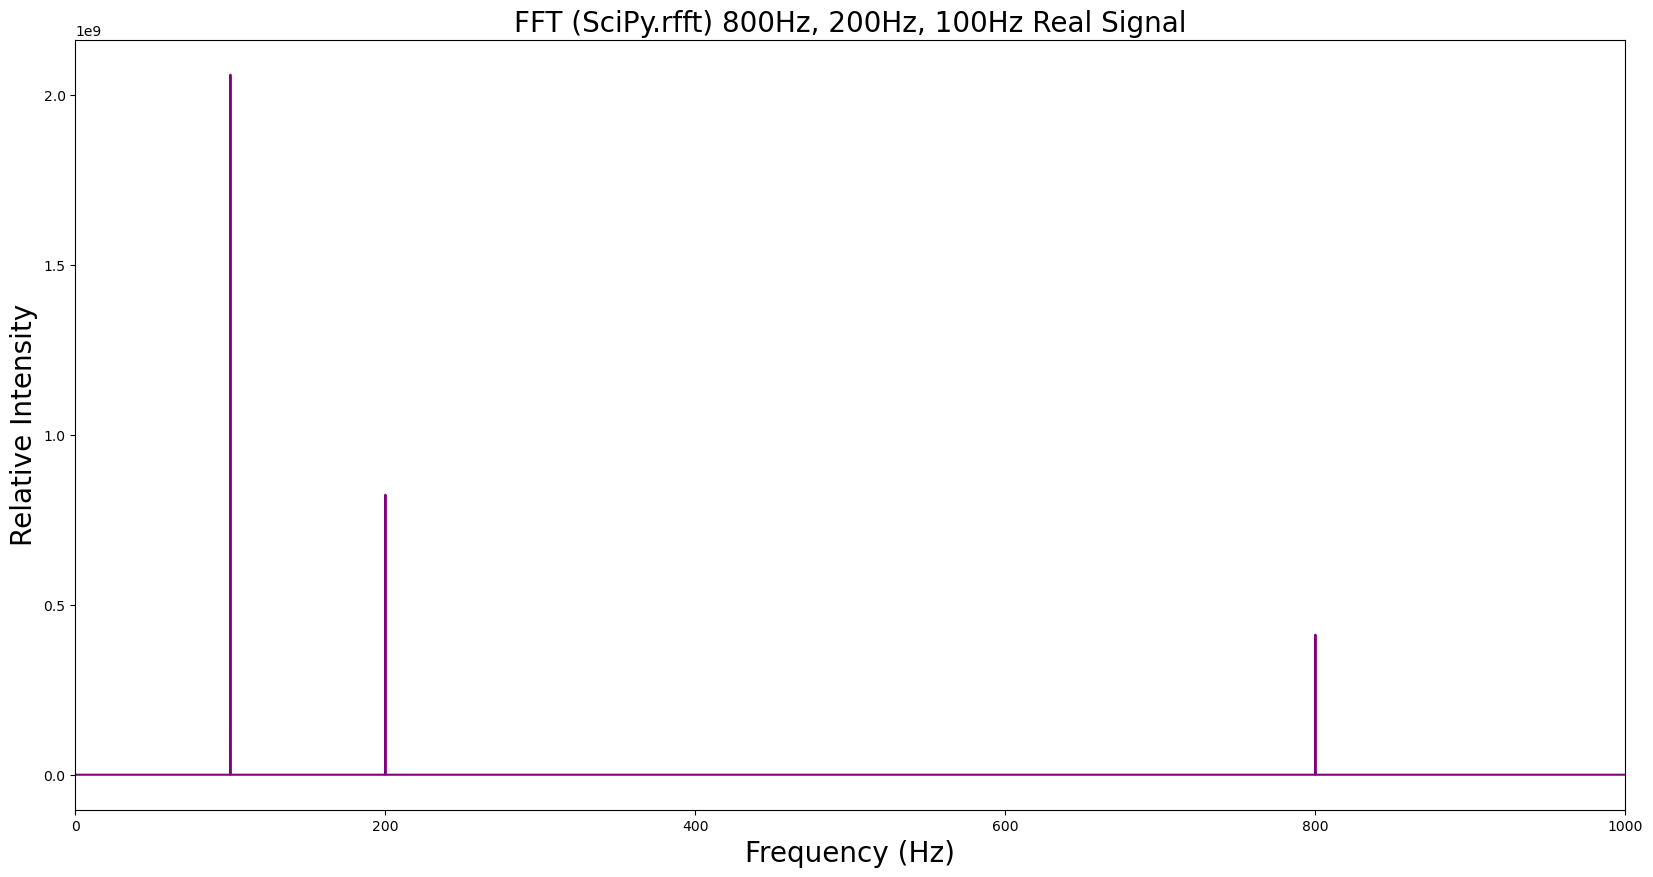

In [68]:
# Check parameters of exported audio as read before plotting FFT
file_name = 'test_sample.wav'
try:
  test_sample = wave.open(file_name)
  number_samples = test_sample.getnframes()
  sample_rate = test_sample.getframerate()
  print(' sample-rate: ', sample_rate, '\n',
        'number-channels: ', test_sample.getnchannels(), '\n',
        'number-samples: ', number_samples, '\n',
        'duration-audio: ', (number_samples / test_sample.getframerate()) )
    
# Plot FFT
  sig_wav = test_sample.readframes(number_samples)
  sig_arr = np.frombuffer(sig_wav, dtype=np.int16)      
  yk = rfft(sig_arr)
  xk = rfftfreq(N, 1/sample_rate)
  plt.figure(figsize=(20,10))
  plt.plot(xk, np.abs(yk), color='purple')
  plt.title('FFT (SciPy.rfft) 800Hz, 200Hz, 100Hz Real Signal',
            fontsize=20)
  plt.ylabel('Relative Intensity',
             fontsize=20)
  plt.xlabel('Frequency (Hz)',
             fontsize=20)
  plt.xlim(0, 1000)
  plt.show()
except:
    raise FileNotFoundError(
    errno.ENOENT, os.strerror(errno.ENOENT), file_name)
finally:
    test_sample.close()    

In [73]:
# Trivially check if simulated and read audio fft's are equal
print(sig_norm)
print(sig_arr)
np.allclose(sig_norm, sig_arr)

[    0  1130  2253 ... -3361 -2253 -1130]
[    0  1130  2253 ... -3361 -2253 -1130]


True

In [ ]:
# Convert fft back to wave


In [ ]:
# check bin discrimination with librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio, sr = librosa.load('XC824126-Agapornis-swindernianus.mp3')
duration = librosa.get_duration(y=audio, sr=sr) #@static
plt.figure(figsize=(20,10))
librosa.display.waveshow(audio, sr=sr)

In [ ]:
# using stft (linear) spectrogram
Ft = librosa.stft(audio)
FtdB = librosa.amplitude_to_db(abs(Ft))
librosa.display.specshow(
    FtdB, 
    sr=sr, 
    x_axis='time', 
    y_axis='hz')

In [ ]:
# try mel spectrum from librosa package
# def wav_to_mel(wav):
#     """
#     compute mel-spectrum from
#     wav encoder
#     """
#     frame = librosa.feature.melspectrogram(
#         Fy = wav,
#         sr=sampling_rate,
#         N_fft = int16(sampling_rate * mel_window_length / 1000),
#         hop_length = int16(sampling_rate * mel_window_step / 1000),
#         num_mels = mel_n_channels)
#     return frames.astype(np.int16).T

# mel_spec = librosa.feature.melspectrogram(
#     audio, 
#     sr, 
#     n_fft=2048, 
#     hop_length=512, 
#     n_mels=10, 
#     fmax=8000)
        
# log_mel_spec = librosa.power_to_db(mel_spec)
# librosa.display(log_mel_spec, x_axis='time', y_axis='mel-bin', sr=sr)